In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import preprocessing

In [53]:
#import function from keras for creating NN model
from keras.models import Sequential
from keras.layers import Dense, Flatten, SimpleRNN, LSTM
from keras.layers.embeddings import Embedding
from keras.optimizers import SGD


In [89]:
#load mnist dataset
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import Input
from keras.optimizers import Adam

In [90]:
#splitting the data into train and test
(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()

In [91]:
#print the shape of the train and test variables
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [92]:
#splitting training data into training and validation
x_val2 = x_train2[:5000]
x_train2 = x_train2[5000:]
y_val2 = y_train2[:5000]
y_train2 = y_train2[5000:]

In [93]:
#print the shape of the train and validation variables
print(x_train2.shape)
print(y_train2.shape)
print(x_val2.shape)
print(y_val2.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


In [94]:
x_train2.ndim

3

In [95]:
x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')
x_val2 = x_val2.astype('float32')
x_train2, x_test2, x_val2 = x_train2 / 255.0, x_test2 / 255.0, x_val2 / 255.0

#one hot encoding for the classes
y_train2 = to_categorical(y_train2, 10)
y_val2 = to_categorical(y_val2, 10)
y_test2 = to_categorical(y_test2, 10)


In [96]:
#reshape the training variables to make them 3 dimensional
#x_train2 = x_train2.reshape(x_train2.shape[0],28,28,1)
#x_test2 = x_test2.reshape(x_test2.shape[0],28,28,1)
#x_val2 = x_val2.reshape(x_val2.shape[0],28,28,1)
#x_train2.shape

In [97]:
mn_model = Sequential()
#mn_model.add(Input(shape=(28,28)))
#mn_model.add(Embedding(max_features, 128, input_length = maxlen))
#mn_model.add(Flatten())
#sc_model.add(Dense(500, activation = 'relu'))
#mn_model.add(Flatten(input_shape=x_train2.shape[1:]))
mn_model.add(SimpleRNN(100, activation = 'relu', input_shape = (28, 28)))
mn_model.add(Dense(10, activation = 'sigmoid'))
#defining learning rate for stochastic gradient descent
#sgd = SGD(lr = 0.01)
#compiling the model
mn_model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
mn_model.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 100)               12900     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 13,910
Trainable params: 13,910
Non-trainable params: 0
_________________________________________________________________


In [98]:
#fitting and evaluating the model
training_hist3 = mn_model.fit(x_train2, y_train2, batch_size=100, epochs = 10, verbose = 2, validation_data = (x_val2, y_val2))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 - 7s - loss: 0.7388 - acc: 0.7568 - val_loss: 0.3191 - val_acc: 0.9072
Epoch 2/10
 - 5s - loss: 0.2751 - acc: 0.9194 - val_loss: 0.1860 - val_acc: 0.9470
Epoch 3/10
 - 5s - loss: 0.1990 - acc: 0.9423 - val_loss: 0.2052 - val_acc: 0.9378
Epoch 4/10
 - 5s - loss: 0.1685 - acc: 0.9515 - val_loss: 0.1395 - val_acc: 0.9592
Epoch 5/10
 - 5s - loss: 0.1632 - acc: 0.9533 - val_loss: 0.1569 - val_acc: 0.9576
Epoch 6/10
 - 5s - loss: 0.1374 - acc: 0.9604 - val_loss: 0.1390 - val_acc: 0.9606
Epoch 7/10
 - 5s - loss: 0.1202 - acc: 0.9656 - val_loss: 0.1055 - val_acc: 0.9718
Epoch 8/10
 - 5s - loss: 0.1169 - acc: 0.9664 - val_loss: 0.1357 - val_acc: 0.9640
Epoch 9/10
 - 5s - loss: 0.1109 - acc: 0.9682 - val_loss: 0.1016 - val_acc: 0.9720
Epoch 10/10
 - 5s - loss: 0.1001 - acc: 0.9713 - val_loss: 0.1198 - val_acc: 0.9670


Text(0, 0.5, 'loss')

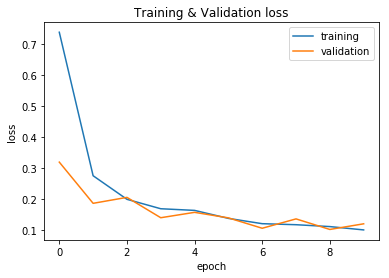

In [99]:
#Plot training and validation loss
plt.plot(training_hist3.history['loss'])
plt.plot(training_hist3.history['val_loss'])
plt.title('Training & Validation loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

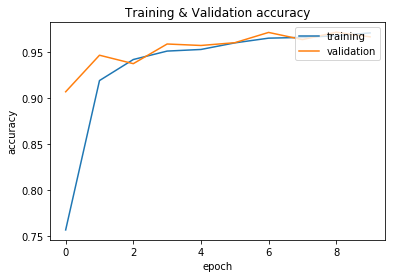

In [107]:
plt.plot(training_hist3.history['acc'])
plt.plot(training_hist3.history['val_acc'])
plt.title('Training & Validation accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [100]:
#accuracy score for SimpleRNN model
loss_accuracy_score3 = mn_model.evaluate(x_test2, y_test2)
print("Loss ", loss_accuracy_score3[0] )
print("Accuracy score:",loss_accuracy_score3[1])

10000/10000 [==============================] - 1s 85us/step
Loss  0.1361474711123854
Accuracy score: 0.9633


In [101]:
mn_model2 = Sequential()
mn_model2.add(LSTM(100, activation = 'tanh', input_shape = (28, 28)))
mn_model2.add(Dense(10, activation = 'sigmoid'))
#defining learning rate for stochastic gradient descent
#sgd = SGD(lr = 0.01)
#compiling the model
mn_model2.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
mn_model2.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100)               51600     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 52,610
Trainable params: 52,610
Non-trainable params: 0
_________________________________________________________________


In [102]:
#fitting and evaluating the model
training_hist4 = mn_model2.fit(x_train2, y_train2, batch_size=100, epochs = 10, verbose = 2, validation_data = (x_val2, y_val2))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
 - 17s - loss: 0.6365 - acc: 0.7996 - val_loss: 0.2116 - val_acc: 0.9410
Epoch 2/10
 - 14s - loss: 0.1753 - acc: 0.9484 - val_loss: 0.1431 - val_acc: 0.9580
Epoch 3/10
 - 15s - loss: 0.1218 - acc: 0.9642 - val_loss: 0.0956 - val_acc: 0.9718
Epoch 4/10
 - 14s - loss: 0.0982 - acc: 0.9707 - val_loss: 0.0795 - val_acc: 0.9770
Epoch 5/10
 - 14s - loss: 0.0805 - acc: 0.9757 - val_loss: 0.0785 - val_acc: 0.9794
Epoch 6/10
 - 16s - loss: 0.0681 - acc: 0.9800 - val_loss: 0.0604 - val_acc: 0.9832
Epoch 7/10
 - 17s - loss: 0.0600 - acc: 0.9821 - val_loss: 0.0634 - val_acc: 0.9818
Epoch 8/10
 - 17s - loss: 0.0533 - acc: 0.9841 - val_loss: 0.0558 - val_acc: 0.9832
Epoch 9/10
 - 15s - loss: 0.0458 - acc: 0.9867 - val_loss: 0.0624 - val_acc: 0.9830
Epoch 10/10
 - 18s - loss: 0.0396 - acc: 0.9878 - val_loss: 0.0471 - val_acc: 0.9852


Text(0, 0.5, 'loss')

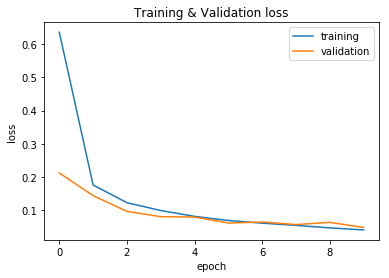

In [103]:
#Plot training and validation loss
plt.plot(training_hist4.history['loss'])
plt.plot(training_hist4.history['val_loss'])
plt.title('Training & Validation loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

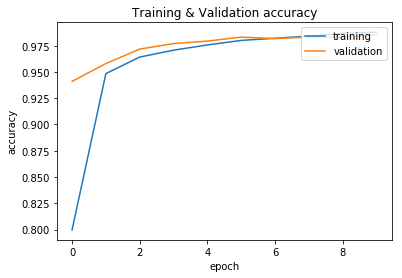

In [108]:
#plotting training and validation accuracy
plt.plot(training_hist4.history['acc'])
plt.plot(training_hist4.history['val_acc'])
plt.title('Training & Validation accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [104]:
#accuracy score for LSTM model
loss_accuracy_score4 = mn_model2.evaluate(x_test2, y_test2)
print("Loss ", loss_accuracy_score4[0] )
print("Accuracy score:",loss_accuracy_score4[1])

10000/10000 [==============================] - 2s 164us/step
Loss  0.051273446225374934
Accuracy score: 0.9847


After comparing the results of both the models(i.e. one using SimpleRNN and one using LSTM), I found that the training accuracy of SimpleRNN model was good also performed well on test data whereas the training accuracy of LSTM model was also good and it performed well on test data too. It has accuracy slightly greater than RNN model